In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
summary = pd.read_csv("atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary
respondents = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat") # Respondant file
activities = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")    # Activity

In [52]:
summary['t010102'].mean() # time sleeplesness in minutes per day

3.8755379885814669

In [53]:
merged = pd.merge(respondents, summary, left_on="TUCASEID", right_on="tucaseid")
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 588 entries, TUCASEID to t500107
dtypes: float64(2), int64(584), object(2)
memory usage: 51.2+ MB


In [54]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [55]:
def top_category(db, name, code):
    cols = activity_columns(db, code)
    db2 = db
    db2[name] = sum(db2[val] for val in cols)
    for val in cols:
        db2 = db2.drop(val, 1)
    return db2

In [56]:
merged = top_category(merged, "Sleep", "01")
merged = top_category(merged, "Household Activities", "02")
merged = top_category(merged, "Caring", "03")
merged = top_category(merged, "Caring NH", "04")
merged = top_category(merged, "Work", "05")
merged = top_category(merged, "Education", "06")
merged = top_category(merged, "Consumer Purchases", "07")
merged = top_category(merged, "Professional Services", "08")
merged = top_category(merged, "Household Services", "09")
merged = top_category(merged, "Government", "10")
merged = top_category(merged, "Eating", "11")
merged = top_category(merged, "Socializing", "12")
merged = top_category(merged, "Sports", "13")
merged = top_category(merged, "Religious", "14")
merged = top_category(merged, "Volunteer", "15")
merged = top_category(merged, "Telephone", "16")
merged = top_category(merged, "Traveling", "18")
merged = top_category(merged, "Data Codes", "50")

In [57]:
merged.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,Household Services,Government,Eating,Socializing,Sports,Religious,Volunteer,Telephone,Traveling,Data Codes
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,35,330,0,0,0,0,0,0
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,75,160,0,0,0,0,20,0
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,170,80,260,0,0,0,65,0
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,70,125,0,0,0,0,75,0
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,120,90,60,0,0,0,0,0


In [61]:
merged.keys()[150]

'TXHRUSL2'

In [85]:
range(5)

range(0, 5)

In [86]:
def remove_cols(db, n):
    my_keys = db.keys()
    db2 = db
    for i in range(n):
        the_key = my_keys[i]
        db2 = db2.drop(the_key, 1)
    return db2

In [96]:
small_merged = remove_cols(merged, 199)

In [126]:
small_merged.head()

,Sleep,Household Activities,Caring,Caring NH,Work,Education,Consumer Purchases,Professional Services,Household Services,Government,Eating,Socializing,Sports,Religious,Volunteer,Telephone,Traveling,Data Codes
0,560,0,60,0,0,455,0,0,0,0,35,330,0,0,0,0,0,0
1,615,111,389,0,0,0,70,0,0,0,75,160,0,0,0,0,20,0
2,540,295,15,0,0,0,15,0,0,0,170,80,260,0,0,0,65,0
3,480,0,0,0,680,0,10,0,0,0,70,125,0,0,0,0,75,0
4,570,90,0,0,0,510,0,0,0,0,120,90,60,0,0,0,0,0


In [125]:
small_merged.ix[1000].sum() / 60

24.0

In [99]:
small_corr = small_merged.corr()

In [103]:
small_corr = small_corr.replace(to_replace=1.0, value=0.)

In [104]:
small_corr.head()

,Sleep,Household Activities,Caring,Caring NH,Work,Education,Consumer Purchases,Professional Services,Household Services,Government,Eating,Socializing,Sports,Religious,Volunteer,Telephone,Traveling,Data Codes
Sleep,0.000000,-0.084213,-0.090716,-0.051244,-0.322544,-0.022278,-0.026222,0.023545,-0.008372,-0.005717,-0.058615,-0.091845,-0.057388,0.053208,-0.051997,-0.019164,-0.174641,-0.061440
Household Activities,-0.084213,0.000000,0.039100,-0.014106,-0.298375,-0.107165,0.042795,-0.019859,0.011151,0.003437,0.030498,-0.144176,-0.066052,-0.052544,-0.031090,0.028693,-0.156974,-0.018254
Caring,-0.090716,0.039100,0.000000,-0.051725,-0.062573,-0.034960,-0.002401,-0.016292,-0.009851,0.003264,0.011546,-0.211447,-0.043669,-0.039746,-0.012504,-0.036513,-0.006237,-0.017532
Caring NH,-0.051244,-0.014106,-0.051725,0.000000,-0.076477,-0.018882,-0.028825,-0.005311,-0.006867,-0.006386,-0.010351,-0.042477,-0.010310,-0.014111,-0.015184,-0.012085,0.022837,-0.016296
Work,-0.322544,-0.298375,-0.062573,-0.076477,0.000000,-0.087591,-0.167082,-0.066176,-0.008774,-0.012666,-0.126081,-0.457195,-0.088892,-0.137520,-0.068408,-0.079424,0.033878,-0.087779


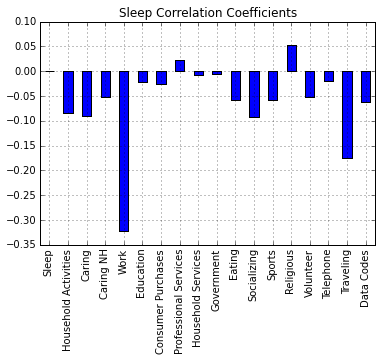

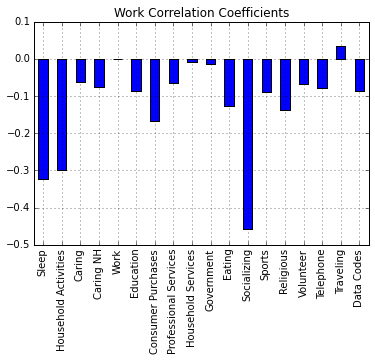

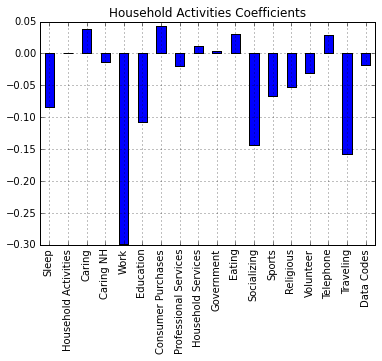

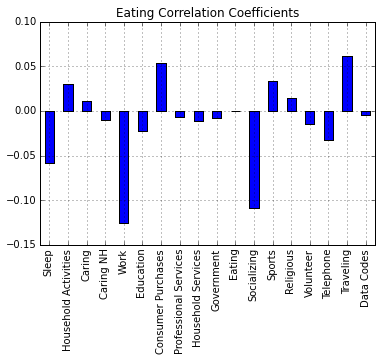

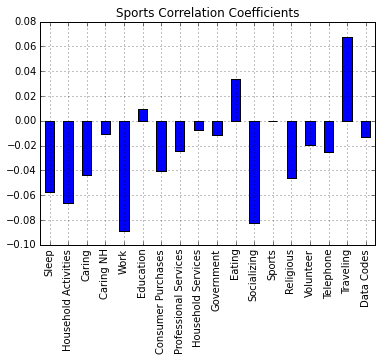

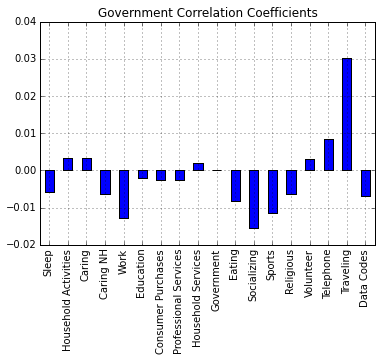

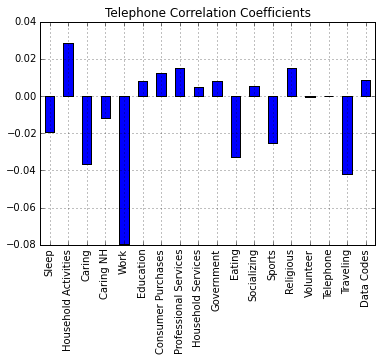

In [119]:
small_corr["Sleep"].plot(kind="bar")
plt.title("Sleep Correlation Coefficients")
plt.show()
small_corr["Work"].plot(kind="bar")
plt.title("Work Correlation Coefficients")
plt.show()
small_corr["Household Activities"].plot(kind="bar")
plt.title("Household Activities Coefficients")
plt.show()
small_corr["Eating"].plot(kind="bar")
plt.title("Eating Correlation Coefficients")
plt.show()
cat = "Sports"
small_corr[cat].plot(kind="bar")
plt.title(cat+" Correlation Coefficients")
plt.show()
cat = "Government"
small_corr[cat].plot(kind="bar")
plt.title(cat+" Correlation Coefficients")
plt.show()
cat = "Telephone"
small_corr[cat].plot(kind="bar")
plt.title(cat+" Correlation Coefficients")
plt.show()

In [92]:
merged.keys()[199]

'Sleep'

In [71]:
merged.corr()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,Household Services,Government,Eating,Socializing,Sports,Religious,Volunteer,Telephone,Traveling,Data Codes
TUCASEID,1.000000,NaN,NaN,0.999963,0.010895,0.005457,0.009365,-0.007849,0.004604,-0.011553,...,0.006647,-0.002223,0.012756,0.003015,0.019879,-0.013561,0.011546,-0.010087,0.019365,0.082516
TULINENO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUMONTH,0.999963,NaN,NaN,1.000000,0.010917,0.005498,0.009388,-0.007742,0.004658,-0.011436,...,0.006643,-0.002145,0.012738,0.003004,0.020090,-0.013554,0.011639,-0.010189,0.019615,0.082416
TEABSRSN,0.010895,NaN,NaN,0.010917,1.000000,-0.000551,0.025883,0.008143,0.022251,0.085602,...,0.000318,0.002237,0.027855,-0.003389,0.019717,0.002514,-0.003890,-0.004370,0.043214,0.047240
TEERN,0.005457,NaN,NaN,0.005498,-0.000551,1.000000,0.258223,-0.029733,0.252198,0.058922,...,0.006684,-0.001396,-0.005403,-0.031553,0.000603,-0.013506,-0.011364,-0.020871,0.011108,-0.007987
TEERNH1O,0.009365,NaN,NaN,0.009388,0.025883,0.258223,1.000000,-0.113452,0.837061,0.224827,...,0.009607,-0.007575,-0.024333,-0.102839,-0.000356,-0.027795,-0.025356,-0.034991,0.056255,-0.021123
TEERNH2,-0.007849,NaN,NaN,-0.007742,0.008143,-0.029733,-0.113452,1.000000,-0.126528,0.146629,...,-0.002897,-0.004330,-0.020547,-0.072722,-0.007147,-0.014780,-0.014656,-0.029558,0.044610,-0.013259
TEERNHRO,0.004604,NaN,NaN,0.004658,0.022251,0.252198,0.837061,-0.126528,1.000000,0.250738,...,-0.003380,-0.006906,-0.063139,-0.109522,-0.023208,-0.026955,-0.031025,-0.044087,0.037970,-0.026804
TEERNHRY,-0.011553,NaN,NaN,-0.011436,0.085602,0.058922,0.224827,0.146629,0.250738,1.000000,...,-0.006093,-0.005001,0.002134,-0.319126,0.013689,-0.065815,-0.031695,-0.092687,0.147771,-0.041356


In [30]:
activity_columns(merged, '05')[:4]

['t050101', 't050102', 't050103', 't050104']

In [32]:
merged['t05'] = merged['t050101'] + merged['t050102']

In [33]:
merged = merged.drop('t050101', 1)